# Inicialización

In [1]:
#Cargar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind
from scipy import stats as st

## Cargar datos

In [2]:
#Cargar los archivos de datos en un dataframe
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Revisión general del dataframe

In [3]:
#Impresión de la información general del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Revisión de los nombres de las columnas
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

## Hallazgos
El dataframe consiste de 11 columnas y 16715 filas.

Las columnas 'Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score', 'Rating', poseen filas con información ausente.

El nombre de las columnas posee un formato que se debe cambiar a minúsculas.

El tipo de datos de las columnas 'Year_of_Release' y 'User_Score' no es el más apropiado, por lo que debe modificarse.

# Preparar los datos

## Reemplazar el nombre de las columnas

In [5]:
#Cambiar el nombre de las columnas a minúsculas
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## Valores ausentes

In [6]:
#Revisar valores ausentes
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

## Columna 'name'

In [7]:
#Imprimir los valores ausentes de la columna 'name'
df[pd.isnull(df['name'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Hallazgos: 

Se puede visualizar que los valores ausentes presentados como NaN de la columna 'name', también presentan datos ausentes para la mayoría de las columnas, por lo que se procederá a la eliminación de estas dos filas.

In [8]:
#eliminar las dos filas NaN de la columna
df = df[pd.notnull(df['name'])]
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

## Columna 'year_of_release'

En esta columna se encuentran algunos datos que están ausentes, para poder rellenarlos se usará una función que los reemplace por el valor de la mediana de la relación que existe en la columna 'platform' con la columna 'year_of_release', ya que los videojuegos que son lanzados al público tienen cierta temporalidad similar por la plataforma en la que hayan sido publicados.

In [9]:
def fill_aus(data, agg_column, value_column):
    grouped_values = data.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for aus in range(size):
        group = grouped_values[agg_column][aus]
        value = grouped_values[value_column][aus]
        data.loc[(data[agg_column]==group) & (data[value_column].isna()), value_column] = value
    return data

In [10]:
#aplicación de la función
fill_aus(df, 'platform', 'year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
#comprobar el que no existen valores ausentes
df['year_of_release'].isna().sum()

0

In [12]:
#transformar el tipo de datos a otro
df['year_of_release'] = df['year_of_release'].astype('int')

In [13]:
#comprobar el cambio de tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


## Columna 'critic_score'

La columna 'critic_score' se la puede asociar con la columna 'genre'. Se usará la función creada anteriormente para llenar los valores ausentes.

In [14]:
#Investigar valores ausentes de columna critic_score
df.query('critic_score.isna() == True')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Se puede observar que existen 8576 valores ausentes de 16713 valores totales. Representando un poco más de la mitad total, por lo que no se podría eliminar estos valores y se los reemplazará con 'Unknown'

In [15]:
#Asignar el valor NAN a los valores ausentes para continuar el análisis sin errores por tipo de dato
df['critic_score'] = df['critic_score'].fillna(np.nan)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Debido a la gran cantidad de valores ausentes, no se puede llenar esta columna con valores de media por posibles valores lejanos. Y se continuará el análisi teniendo estos valores ausentes.

## Columna 'user_score'

Lo llamativo de esta columna es el tipo de datos que presenta, porque son valores flotantes, pero la columna dice ser tipo object. Lo que puede indicar que existan valores que sean string por lo que menciona ser tipo object la columna. Se procederá a analizar la columna y determinar como transformarla al tipo de datos correcto.

In [17]:
# Revisar los valores de la columna
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [18]:
#Cuantificar valores ausentes de columna user_score
df.query('user_score.isna() == True')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Aparece un valor como 'tbd' que significa to be determined (por ser determinado) y este es el motivo por el cual la columna da como tipo object. Además existen 6699 valores ausentes, representando alrededor del 40% de los datos totales de la columna, por lo que no se podría borrar estos valores y tratar de llenarlos con valores promedio podría dar error en la interpretación de estos, por lo que se continuará el análisis con los valores ausentes.

In [19]:
#Contar las veces que 'tbd' se repite
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.3       2
0.6       2
1         2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

El número de veces que 'tbd' se repite es de 2424, siendo una gran cantidad no se los borraría.

In [20]:
#Aplicar el valor NAN a los valores ausentes 
df['user_score'] = df['user_score'].fillna(np.nan)

In [21]:
#Investigar tipo de dato de columna user_score
df.query('user_score == "tbd"').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,2003,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


Los valores 'tbd' de usuarios que pudieron deberse a que no proporcionaron un valor de calificación, al ser numerosos impide el poder cambiarlos de manera que no comprometa la interpretación de datos, por lo que no se podría cambiar el tipo de datos de la columna a 'float' y se mantendría del tipo que esta.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


## Columna 'rating'

In [23]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

A diferencia de las otras columnas, esta no usa valores numéricos. Por lo tanto se puede usar una función diferente que tome en cuenta que clasificaciones son las que más se repiten tomando en cuenta los datos de la columna 'genre'.

In [24]:
# Creación de la función para reemplazar los valores ausentes
def fill_rating(data, agg_column, value_column):
    grouped_values = data.groupby(agg_column)[value_column].agg(pd.Series.mode).reset_index()
    size = len(grouped_values)
    for aus in range(size):
        group = grouped_values[agg_column][aus]
        value = grouped_values[value_column][aus]
        data.loc[(data[agg_column]==group) & (data[value_column].isna()), value_column] = value
    return data

In [25]:
#Aplicar la función
fill_rating(df, 'genre', 'rating')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,T
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,T
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,E
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,E
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,E


In [26]:
#Comprobar si existen valores ausentes
df['rating'].isna().sum()

0

Una información que es de recalcar es que la clasificación del ESRB, es que la clasificación de 'K-A' está obsoleta porque fue reemplazada por la de 'E', por lo tanto también se realizará este cambio.

In [27]:
df['rating'] = df['rating'].replace({'K-A' : 'E'})
df['rating'].unique()

array(['E', 'T', 'M', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Finalmente todas los valores ausentes han sido llenados y las columnas tienen el correcto tipo de dato según la información que contenga.

## Añadir columna 'total_sales'

In [29]:
#Crear una columna que sume todas las ventas en todas las regiones
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,T,31.38


In [30]:
# Añadición de una columna de ventas  por año
df['sales_per_year'] = round( df['total_sales'] /  (2017-df['year_of_release'])  ,2)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_per_year
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54,7.50
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E,40.24,1.26
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,3.95
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77,4.10
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,T,31.38,1.49


# Análisis de datos

## Número de juegos lanzados por años

Determinar cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?


In [31]:
# Crearemos un nuevo dataframe con la información de los juegos lanzados en diferentes años
df_gyear = df.groupby('year_of_release')['name'].count().reset_index(drop=False)
df_gyear

,year_of_release,name
0,1980,9
1,1981,46
2,1982,53
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


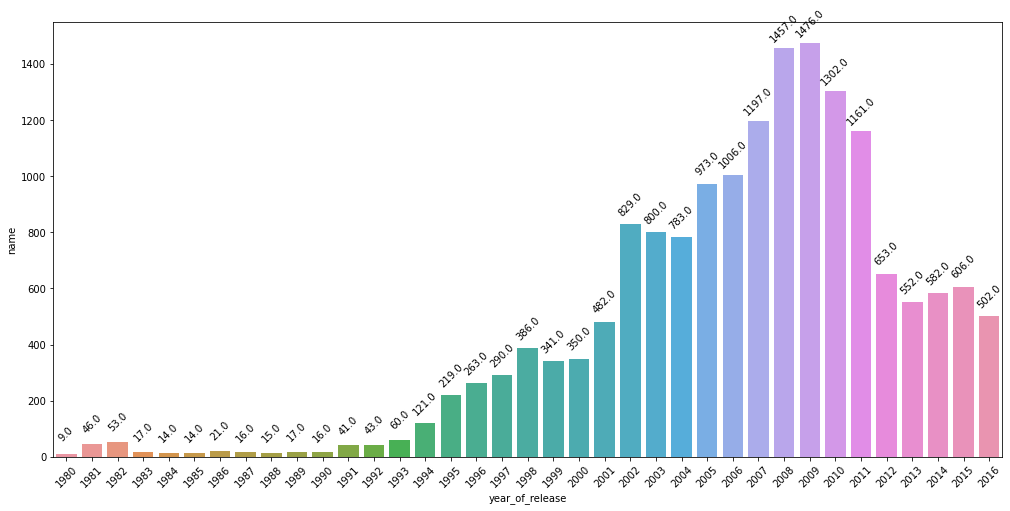

In [32]:
plt.figure(figsize=(17,8))
splot = sns.barplot(data=df_gyear, x='year_of_release', y='name') 
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), rotation=45,
                   textcoords = 'offset points')
plt.xticks(rotation = 45) 
plt.show()

- En 1994 fue el año donde la cantidad de juegos que fueron lanzados alcanzaron los triple dígitos.

- En 1998, 2001 y 2002, alcanzaron picos significativos, que pueden darse debido a la expansión tecnológica de esos tiempos y como el acceso al Internet y la información a mayor escala.

- Es ya en el 2009 el pico más alto que alcanzaron los videojuegos, desde ahí ha ido en declive la cantidad de juegos lanzados por año.

- En el 2016 se mantiene encima de los 500 juegos lanzados. Este declive de cantidad puede darse como motivos de tendencias de un mercado a parte de las plataformas consideradas que sería el de los juegos móviles y también el costo de realizar videojuegos ha aumentando por lo que genera que sean lanzados de manera más esporádica.

- Se puede concluir que previo al 2002 la cantidad de juegos lanzados era baja debido a que era un mercado nuevo y recién desarrollandose, entre el 2002 y 2011 fue el tiempo donde hubo la cantidad más grande de lanzamientos por años. Posterior al 2012 la cantidad de juegos lanzados se ha mantenido estable en números pero a la mitad de lo que fue durante su auge.

## Ventas por plataforma

Observar cómo varían las ventas de una plataforma a otra. Elegir las plataformas con las mayores ventas totales y construir una distribución basada en los datos de cada año. Buscar las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [33]:
#Ventas totales por plataforma
pf_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
pf_sales

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Text(0, 0.5, 'Ventas Totales')

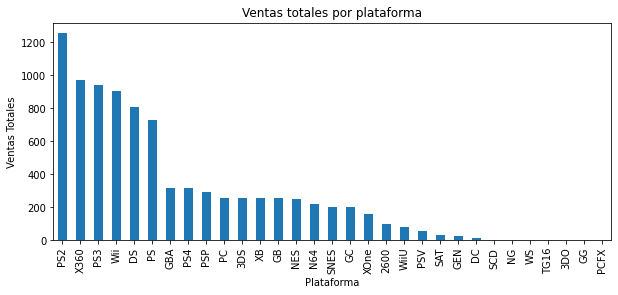

In [34]:
#Gráfico de ventas totales por plataforma
pf_sales.plot(kind='bar', figsize=(10,4))

plt.title('Ventas totales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales')

Tomaremos en cuenta las 5 plataformas con mayores ventas para el análisis posterior.

In [35]:
#Las top 5 plataformas
pf_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head()
pf_sales

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64

Las 5 plataformas que más ventas poseen son: PS2, X360, PS3, Wii, DS.

  platform  total_sales
0      PS2      1255.77
1     X360       971.42
2      PS3       939.65
3      Wii       907.51
4       DS       806.12


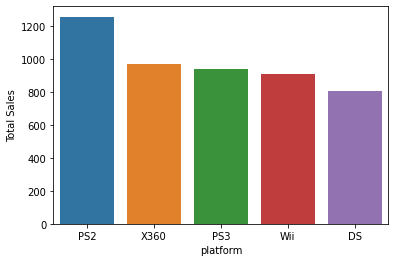

In [36]:
#Gráfico de las top 5 plataformas
top_five_sales = pf_sales.head(5).reset_index()

print(top_five_sales)

sns.barplot(x="platform", y="total_sales", data=top_five_sales)
plt.ylabel('Total Sales')
plt.show()

In [37]:
# Ganancias según la plataforma
(df.groupby('platform')['total_sales'].sum()/df.groupby('platform')['total_sales'].count()).sort_values(ascending=False).head(10)

platform
GB      2.606735
NES     2.561735
GEN     1.050000
SNES    0.836987
PS4     0.801378
X360    0.769746
2600    0.729173
PS3     0.705973
Wii     0.687508
N64     0.685517
Name: total_sales, dtype: float64

In [38]:
# Las 5 plataformas más rentables históricas
for plat in ['GB','NES','GEN','SNES','PS4']:
    print(plat,df.query('platform == @plat')['year_of_release'].min())

GB 1988
NES 1983
GEN 1990
SNES 1990
PS4 2013


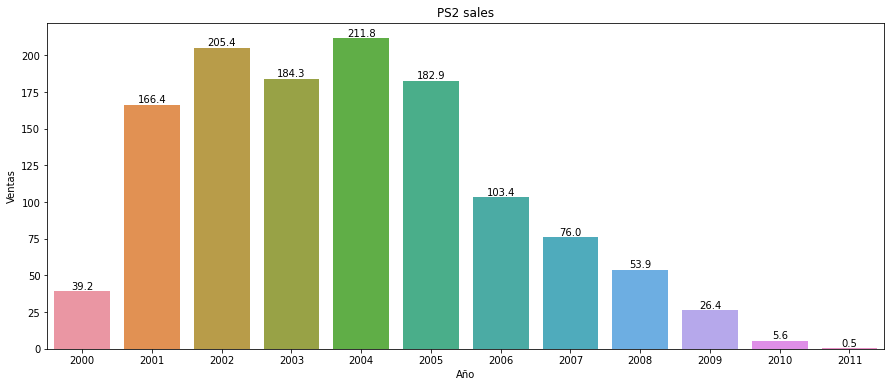

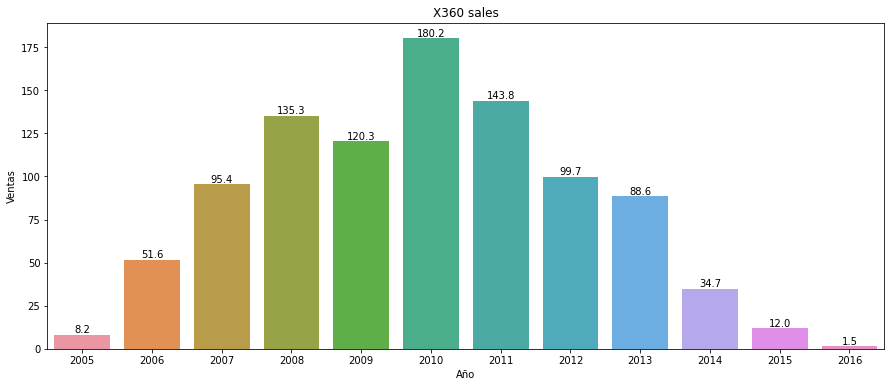

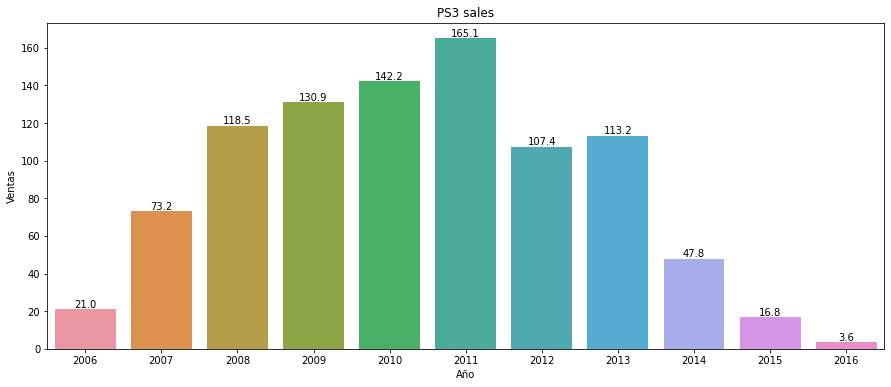

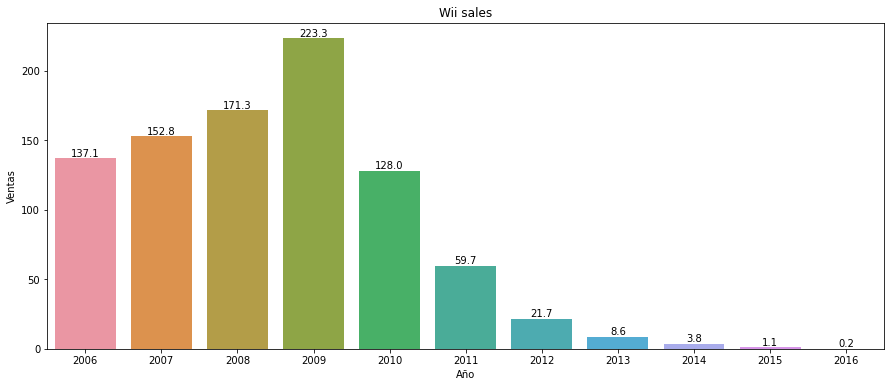

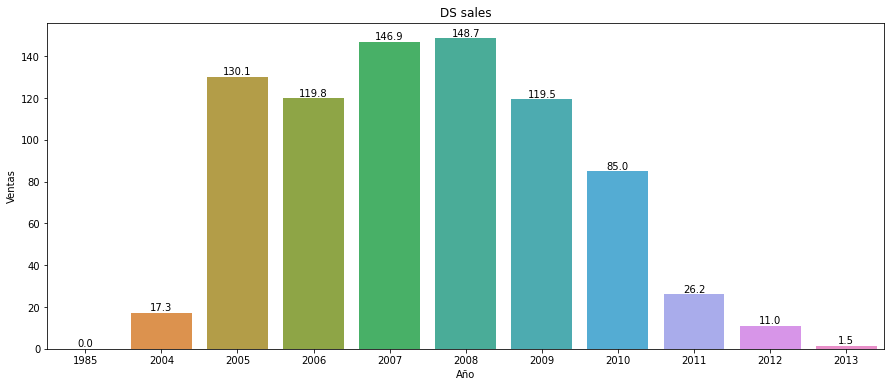

In [39]:
for platform in pf_sales.index: 
    plat_slice = df.query('platform == @platform')
    plat_groupby = plat_slice.groupby('year_of_release')['total_sales'].sum().reset_index(drop=False)
    plt.figure(figsize=(15, 6))
    splot = sns.barplot(data=plat_groupby, x='year_of_release', y='total_sales') 
    for g in splot.patches:
        splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), rotation=0,
                   textcoords = 'offset points')
    plt.title('{} sales'.format(platform))
    plt.xlabel('Año')
    plt.ylabel('Ventas')
    plt.xticks(rotation = 0)
    plt.show()
    print('')


- La plataforma PS2 (PlayStation 2) es la que posee más ventas comparada entre las 5 plataformas con más ventas. 

- Las 5 top plataformas fueron lanzadas posterior a los 2000.
 
- PS2 tuvo su pico durante el 2002-2005, donde en el 2006 tuvo una drástica caída por el lanzamiento del PS3.

- El PS3 tuvo su pico en el 2011, siendo el mismo año donde el PS2 ya no realizaba más ventas.

- Las demás plataformas tuvieron ventas aún en el 2016, pero eran muy bajas.

Aunque el PS2 tuvo una gran cantidad de ventas, ya no es relevante en los tiempos actuales por la existencia de su reemplazo del PS3, esto mismo ocurre para las demás plataformas que ya no resultarían rentables si se aplicarán en un modelo de proyecciones para el 2017. Aquí sería recomendable ver otras alternativas de plataformas como las que todavía generan ventas significativas en el período 2011 - 2016.


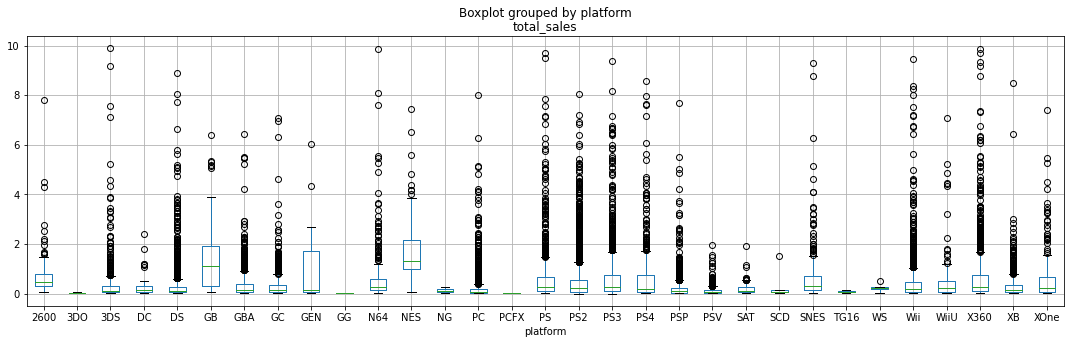

In [40]:
df.query('total_sales<10').boxplot(column='total_sales',by='platform',figsize=(18, 5))
plt.show()

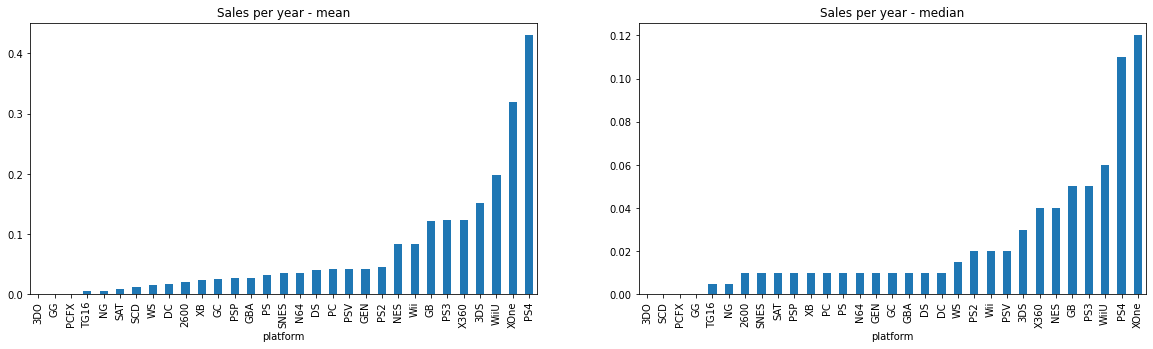

In [41]:
plt.subplots(figsize=(20, 5)) 
df.groupby('platform')['sales_per_year'].mean().sort_values().plot(kind='bar', ax= plt.subplot(1,2,1))
plt.title('Sales per year - mean')
df.groupby('platform')['sales_per_year'].median().sort_values().plot(kind='bar', ax= plt.subplot(1,2,2))
plt.title('Sales per year - median')
plt.show()

Los ingresos anuales promedio de las plataformas PS4, XOne, WiiU, 3DS y X360 están en los promedios más altos.

Las medianas de las plataformas XOne, PS4, WiiU, PS3 y GB son las más altas.

Tomando en cuenta los datos anteriores, donde las plataformas con mayores ingresos históricos se encuentran a la mitad en los gráficos del promedio de ingreso anual, podemos confirmar que hay plataformas que en dado momento tuvieron mucho exito, como lo son PS2 y PS3, sin embargo actualmente son otras las que lideran el mercado y pueden crecer.

## Tiempo de vida de plataformas

In [42]:
#plataformas únicas
df['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

###### Se eligen grupos de consolas similares que actualmente tienen altos ingresos por año :

- Wii y WiiU

- X360, XB y XOne

- PS, PS2, PS3 y PS4

In [43]:
# Año del primer juego lanzado en cada plataforma
for plat in ['Wii','WiiU','XB','X360','XOne','PS','PS2','PS3','PS4']:
    print('Año de lanzamiento del primer juego de esta plataforma',plat,':'
          ,df.query('platform == @plat')['year_of_release'].min())

Año de lanzamiento del primer juego de esta plataforma Wii : 2006
Año de lanzamiento del primer juego de esta plataforma WiiU : 2012
Año de lanzamiento del primer juego de esta plataforma XB : 2000
Año de lanzamiento del primer juego de esta plataforma X360 : 2005
Año de lanzamiento del primer juego de esta plataforma XOne : 2013
Año de lanzamiento del primer juego de esta plataforma PS : 1994
Año de lanzamiento del primer juego de esta plataforma PS2 : 2000
Año de lanzamiento del primer juego de esta plataforma PS3 : 2006
Año de lanzamiento del primer juego de esta plataforma PS4 : 2013


Las consolas Wii y WiiU de Nintendo tienen 6 años entre ellas.

Las consolas XB, X360 y XOne de Microsoft tienen 6 años entre la primera y la segunda,8 entre la segunda y la última.

Las consolas PS, PS2, PS3 y PS4 de Sony tienen 6 años entre la primera y la segunda, 6 entre la segunda y la tercera y 7 entre la tercera y la última.

In [44]:
#Cálculo de la media y la mediana de los años de vida de las plataformas
years = [6,5,8,6,6,7]
print('En promedio, el tiempo de vida de las plataformas analizadas es de',round(sum(years)/len(years),2),'años')
print('La mediana del tiempo de vida de las plataformas analizadas es de 6 años')

En promedio, el tiempo de vida de las plataformas analizadas es de 6.33 años
La mediana del tiempo de vida de las plataformas analizadas es de 6 años


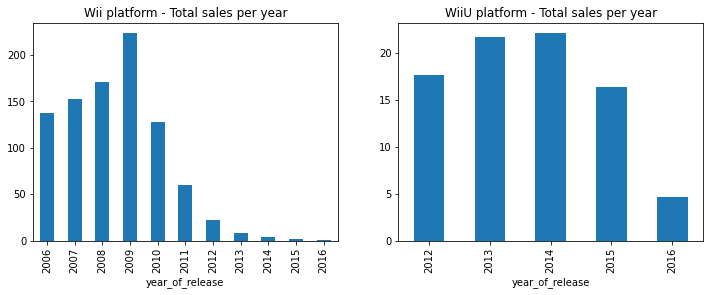

In [45]:
#Ventas por año de consolas Wii y WiiU
plt.subplots(figsize=(12, 4)) 
df.query('platform=="Wii"').groupby('year_of_release')['total_sales'].sum().plot(kind='bar'
                                                                    ,ax=plt.subplot(1,2, 1)) 
plt.title('Wii platform - Total sales per year') 
df.query('platform == "WiiU"').groupby('year_of_release')['total_sales'].sum().plot(kind='bar'
                                                                   ,ax=plt.subplot(1, 2, 2)) 
plt.title('WiiU platform - Total sales per year') 
plt.show() 

El Wii vio su pico en el 2009, 4 años después de que salió al mercado, pero ya es en el 2012 donde recae de gran manera. Puede atribuirse a que fue el mismo año donde el WiiU salió al mercado, aunque no ha tenido un impacto tan significativo como lo tuvo el Wii.


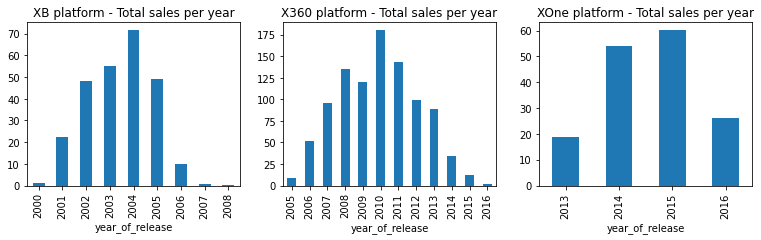

In [46]:
#Ventas por año de consolas X360,XB y XOne
plt.subplots(figsize=(13, 3)) 

for data, console in enumerate(["XB","X360","XOne"]): 
    df.query('platform == @console').groupby('year_of_release')['total_sales'].sum().plot(kind='bar',
                                                            ax=plt.subplot(1,3, data + 1))
    plt.title(console + " platform - Total sales per year")
plt.show()

La plataforma XB, tuvo su pico en el 2004 y un descenso severo en el 2006, ante esto por la llegada la mercado de la siguiente plataforma la X360, esta consecuentemente tuvo su pico en el 2010 y es recien en el 2014 donde tuvo su caida más notoria. Finalmente la XOne tuvo un pico notable en el 2015 y se mantiene en venta todavía en el 2016.


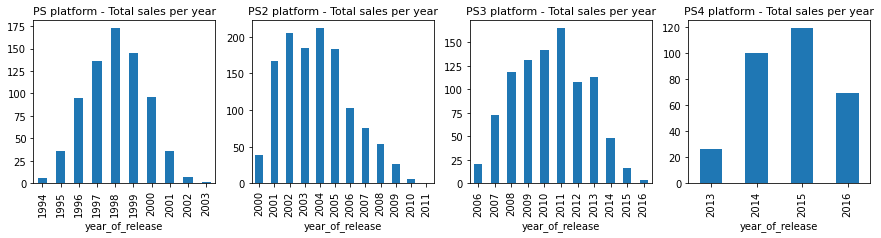

In [47]:
#Ventas por año de consolas PS, PS2, PS3 y PS4
plt.subplots(figsize=(15, 3)) 

for i, console in enumerate(["PS", "PS2", "PS3", "PS4"]): 
    df.query('platform == @console').groupby('year_of_release')['total_sales'].sum().plot(kind='bar'
                                                                        ,ax=plt.subplot(1,4, i + 1))
    plt.title(console + " platform - Total sales per year",fontsize = 11)

plt.show()

Se puede apreciar que al aparecer una nueva plataforma, la plataforma anterior decae en sus ingresos. Tienen comportamientos, picos y caídas similares las plataformas entre sí.


In [48]:
#Denotar las plataformas que tienen menos de 6 años de lanzamiento
print('Plataformas que su primer juego fue lanzado en el 2011 o posterior:')
for plat in ['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG','N64', 'NES', 'NG', 'PC', 'PCFX','PS'
        ,'PS2', 'PS3', 'PS4', 'PSP','PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360','XB', 'XOne']:
    if df.query('platform == @plat')['year_of_release'].min() >=2011:
        print (plat, '- Primer juego fue lanzado en',df.query('platform == @plat')['year_of_release'].min())

Plataformas que su primer juego fue lanzado en el 2011 o posterior:
3DS - Primer juego fue lanzado en 2011
PS4 - Primer juego fue lanzado en 2013
PSV - Primer juego fue lanzado en 2011
WiiU - Primer juego fue lanzado en 2012
XOne - Primer juego fue lanzado en 2013


###### Conclusión:

Se estima que cada 6 años cambia el mercado tras el ingreso de nuevas plataformas, por lo que no se consideran relevantes los juegos con más de 6 años desde su lanzamiento.

Por lo tanto se determina que los datos útiles para el modelo del 2017 son los juegos que han sido lanzados desde el 2012, es decir juegos que no tengan más de 6 años.

In [49]:
dataset_after_2012 = df.query('year_of_release > 2011')

## Relación entre ventas y reseñas

En esta sección revisaremos la relación que pueda existir entre las ventas y las reseñas de usuarios y críticos, en como puedan afectar la percepción de compra de juegos.

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


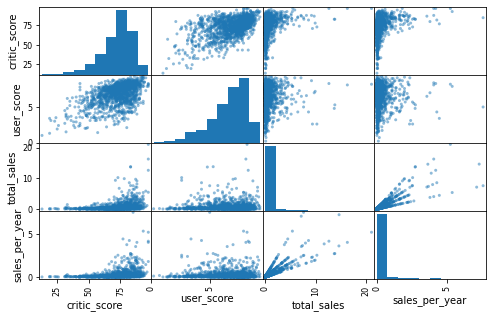

In [50]:
#Matriz de dispersión
df_no_tbd = dataset_after_2012.query('user_score!="tbd" ')
df_no_tbd.loc[:, 'user_score'] = df_no_tbd['user_score'].astype('float')

scat_matrix = pd.plotting.scatter_matrix(df_no_tbd.loc[:,['critic_score','user_score','total_sales','sales_per_year']]
            , figsize=(8, 5))

In [51]:
#Matriz de correlación sin user_score
dataset_after_2012.loc[:,['critic_score','total_sales','sales_per_year']].corr()

,critic_score,total_sales,sales_per_year
critic_score,1.000000,0.30829,0.304217
total_sales,0.308290,1.00000,0.854410
sales_per_year,0.304217,0.85441,1.000000


In [52]:
#Matriz de correlación con user_score
df_no_tbd.loc[:,['user_score','total_sales','sales_per_year']].corr()

,user_score,total_sales,sales_per_year
user_score,1.000000,0.004817,-0.007373
total_sales,0.004817,1.000000,0.853683
sales_per_year,-0.007373,0.853683,1.000000



Existe una débil correlación entre las ventas totales y las reseñas, tiende a ocurrir que si tiene buenas reseñas tendrá mejores ventas. Pero como es débil esta correlación es a un nivel mínimo. También tomar en cuenta que existe una cantidad considerable de valores ausentes que no permitiría generalizar este resultado.


Para confirmar o rechazar la correlación entre la columna critic_score y total_sales se hace una prueba de coeficiente de correlación de Pearson y se obtiene el valor p.

- Hipotesis nula: no hay correlación entre las calificaciones de los críticos y las ventas totales de los juegos

- Hipótesis alterna: si hay correlación entre las calificaciones de los críticos y las ventas totales de los juegos

In [53]:
# Cálculo de correlación y significancia
r, p = st.pearsonr(df_no_tbd.query('critic_score.isna() == False')['critic_score'], df_no_tbd.query(
                                    'critic_score.isna() == False')['total_sales'])
r = round(r,3)
print(f"Correlación Pearson: coeficiente = {r}, p-value ={p}")

alpha=0.05
if p < alpha: print("Se rechaza la hipótesis nula") 
else: print("No se rechaza la hipótesis nula")  

Correlación Pearson: coeficiente = 0.307, p-value =7.876120674834887e-30
Se rechaza la hipótesis nula


### Relación entre ventas y reseñas para la PS4

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


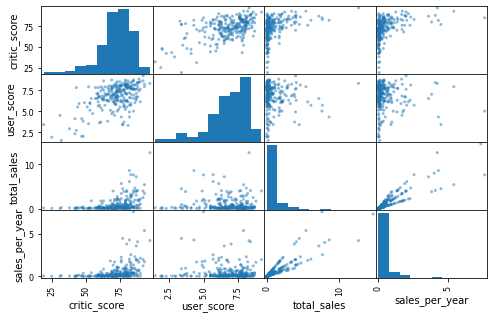

In [54]:
df_ps4 = dataset_after_2012.query('platform == "PS4" and user_score!="tbd"')
#Matriz de dispersión
df_ps4.loc[:, 'user_score'] = df_ps4['user_score'] .astype('float')
scat_matrix = pd.plotting.scatter_matrix(df_ps4.loc[:,['critic_score','user_score','total_sales','sales_per_year']]
            , figsize=(8, 5))

In [55]:
df_ps4.loc[:,['critic_score','user_score','total_sales','sales_per_year']].corr()

,critic_score,user_score,total_sales,sales_per_year
critic_score,1.000000,0.557654,0.406469,0.387845
user_score,0.557654,1.000000,-0.031957,-0.039419
total_sales,0.406469,-0.031957,1.000000,0.893522
sales_per_year,0.387845,-0.039419,0.893522,1.000000


Para confirmar o rechazar la correlación entre la columna critic_score y total_sales, de la plataforma PS4, se hace una prueba de coeficiente de correlación de Pearson y se obtiene el valor p.

Hipotesis nula: no hay correlación entre las calificaciones de los críticos y las ventas totales de los juegos

Hipótesis alterna: si hay correlación entre las calificaciones de los críticos y las ventas totales de los juegos

In [56]:
# Cálculo de correlación y significancia
r, p = st.pearsonr(df_ps4.query('critic_score.isna() == False')['critic_score'], df_ps4.query(
                                    'critic_score.isna() == False')['total_sales'])
r = round(r,3)
print(f"Correlación Pearson: coeficiente = {r}, p-value ={p}")

alpha=0.05
if p < alpha: print("Se rechaza la hipótesis nula") 
else: print("No se rechaza la hipótesis nula")  

Correlación Pearson: coeficiente = 0.406, p-value =2.3015406728057746e-11
Se rechaza la hipótesis nula


El análisis muestra que no hay evidencias de que las columnas critic_score y total_sales no estén relacionadas en cuanto a los ingresos de la plataforma PS4. Se puede inferir que las calificaciones de los usuarios no afecta mucho las ventas, pero la de los críticos profesionales si puede afectar.


## Ventas del mismo juego en distintas plataformas


In [57]:
#Vista previa de los juegos de la plataforma XOne
df_xone = dataset_after_2012.query('platform == "XOne"')
df_xone.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_per_year
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,M,7.39,3.69
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47,1.82
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26,1.75
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49,2.24
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22,2.11


In [58]:
#Vista previa de los juegos de la plataforma PS4
df_ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_per_year
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,M,14.63,7.32
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,4.21
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,4.29
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,M,7.98,3.99
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66,2.55


In [59]:
# Buscaremos de una franquicia muy popular para comparar con otra plataforma
df_xone[df_xone.name.str.contains('Call of Duty')]['name'].value_counts()

Call of Duty: Infinite Warfare    1
Call of Duty: Ghosts              1
Call of Duty: Advanced Warfare    1
Call of Duty: Black Ops 3         1
Name: name, dtype: int64

In [60]:
# Buscaremos de la misma franquicia para su posterior comparación
df_ps4[df_ps4.name.str.contains('Call of Duty')]['name'].value_counts()

Call of Duty: Infinite Warfare    1
Call of Duty: Ghosts              1
Call of Duty: Advanced Warfare    1
Call of Duty: Black Ops 3         1
Name: name, dtype: int64

In [61]:
# De los 4 títulos que se repiten , tomaremos Call of Duty: Black Ops 3
dataset_after_2012.query('name == "Call of Duty: Ghosts"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_per_year
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24,2.56
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36,2.34
323,Call of Duty: Ghosts,PS4,2013,Shooter,1.78,1.43,0.05,0.57,78.0,3.7,M,3.83,0.96
493,Call of Duty: Ghosts,XOne,2013,Shooter,1.88,0.77,0.00,0.27,78.0,4.3,M,2.92,0.73
2916,Call of Duty: Ghosts,PC,2013,Shooter,0.23,0.41,0.00,0.05,NaN,NaN,M,0.69,0.17
5348,Call of Duty: Ghosts,WiiU,2013,Shooter,0.22,0.09,0.01,0.03,69.0,3.4,M,0.35,0.09


###### Conclusión:
Tomamos como ejemplo el juego Call of Duty: Black Ops 3, lanzado en el 2015, que poseen calificaciones idénticas entre las plataformas ya sea por críticos profesionales o de usuarios. Pero la venta más alta va hacia la plataforma PS4, duplicando la generada por la XOne, los factores que puedan generar que una plataforma sean de mayor preferencia que la de otra no se podrían determinar, pero en este caso se puede indicar que no influye la calificación de críticos y usuarios porque son las mismas en todas las plataformas en la que el juego está disponible.



## Ventas por género de juego

In [62]:
#Cantidad de juegos por categoría a partir del 2012
dataset_after_2012['genre'].value_counts().sort_values(ascending=False)

Action          1032
Role-Playing     372
Adventure        303
Sports           269
Shooter          236
Misc             192
Racing           116
Fighting         109
Platform          85
Simulation        82
Strategy          71
Puzzle            28
Name: genre, dtype: int64

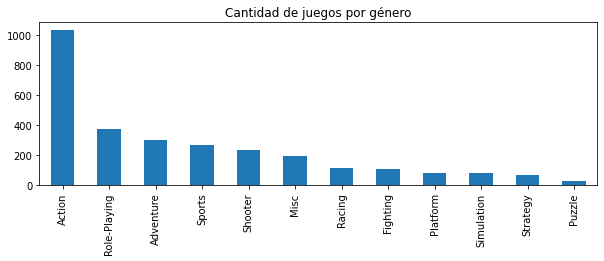

In [63]:
#Cantidad de juegos por categoría (datos recientes)
dataset_after_2012['genre'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(10,3),
                                                                         title="Cantidad de juegos por género")
plt.show()

In [64]:
#Ingresos históricos por categoría por año
dataset_after_2012.groupby('genre')['sales_per_year'].sum().sort_values(ascending=False)

genre
Action          152.97
Shooter         123.55
Sports           75.35
Role-Playing     72.73
Misc             26.96
Platform         19.04
Racing           18.23
Fighting         17.32
Adventure        12.25
Simulation       11.54
Strategy          4.52
Puzzle            1.42
Name: sales_per_year, dtype: float64

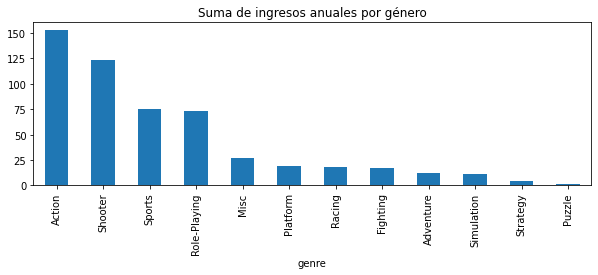

In [65]:
#Ingresos históricos por categoría por año
dataset_after_2012.groupby('genre')['sales_per_year'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(10,3),
                                                             title="Suma de ingresos anuales por género")
plt.show()

In [66]:
#Promedio de ingresos por año
dataset_after_2012.groupby('genre')['sales_per_year'].mean().sort_values(ascending=False)

genre
Shooter         0.523517
Sports          0.280112
Platform        0.224000
Role-Playing    0.195511
Fighting        0.158899
Racing          0.157155
Action          0.148227
Simulation      0.140732
Misc            0.140417
Strategy        0.063662
Puzzle          0.050714
Adventure       0.040429
Name: sales_per_year, dtype: float64

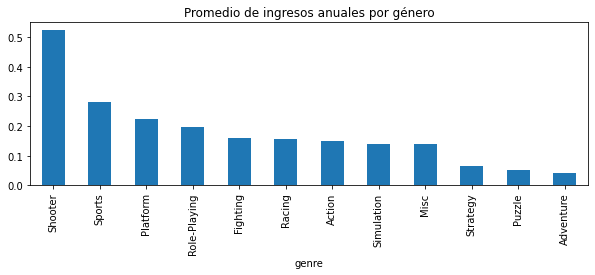

In [67]:
#Promedio de ingresos por año
dataset_after_2012.groupby('genre')['sales_per_year'].mean().sort_values(ascending=False).plot(
    kind='bar',figsize=(10,3),title="Promedio de ingresos anuales por género")
plt.show()

In [68]:
#Ingresos anuales máximos de cada género
dataset_after_2012.groupby('genre')['sales_per_year'].max().sort_values(ascending=False)

genre
Sports          7.60
Shooter         7.32
Role-Playing    7.14
Action          5.26
Fighting        2.52
Racing          2.36
Misc            2.30
Platform        1.98
Simulation      1.83
Adventure       0.94
Strategy        0.42
Puzzle          0.40
Name: sales_per_year, dtype: float64

###### Conclusión:
El género de acción es el que tiene mayor número de juegos, también mayores ingresos totales y por año.

Al revisar el promedio de ingresos por año y por juego, los juegos de mayor promedio son los 'Shooter', los cuales representan más del doble de los ingresos de los de acción. Es de recalcar que la cantidad de juegos de tiro son la mitad de los de acción, cosa que explicaria por qué los ingresos históricos de los de acción son más altos.

Analizando los ingresos anuales máximos, los géneros que han tenido los mayores ingresos anuales son deportes, de tiro y los de rol, seguidos por los de acción; cuyos ingresos totales aumentan al haber más juegos de este tipo.

Los juegos de categorías de rompecabezas, aventura y estrategia, son los de menores ingresos históricos y los promedios anuales.

## Ventas por rating ESRB

La columna rating tiene los siquientes valores:

- E (todos)
- EC (mayores de 3 años)
- E10+ (mayores de 10 años)
- T (mayores de 13 años)
- M (mayores de 17 años)
- AO (sólo para adultos de 18 años en adelante)
- RP (pendiente de clasificar)

In [69]:
#Cantidad de juegos por clasificación posterior al 2011
dataset_after_2012['rating'].value_counts().sort_values(ascending=False)

T       1166
E        889
M        532
E10+     308
Name: rating, dtype: int64

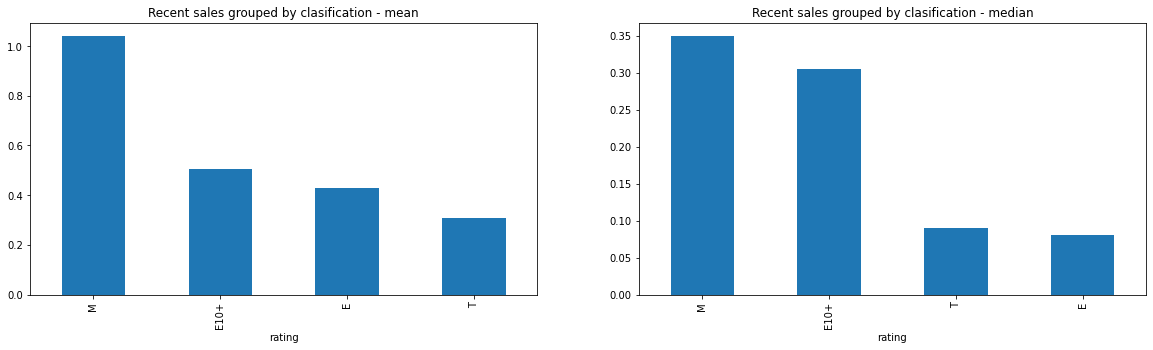

In [70]:
#Ingresos recientes de juegos por año clasificación
plt.subplots(figsize=(20, 5)) 
dataset_after_2012.groupby('rating')['total_sales'].mean().sort_values(ascending=False).plot(
    kind='bar', ax= plt.subplot(1,2,1))
plt.title('Recent sales grouped by clasification - mean')

dataset_after_2012.groupby('rating')['total_sales'].median().sort_values(ascending=False).plot(
    kind='bar', ax= plt.subplot(1,2,2))
plt.title('Recent sales grouped by clasification - median')

plt.show()

###### Conclusiones:

En los últimos años los juegos de clasificación M tienen el mayor promedio y la mayor mediana, seguidos por los E10+.

# Perfiles de usuario según la región

Para cada región (NA, UE, JP) se determinará:

- Las cinco plataformas principales. Describir las variaciones en sus cuotas de mercado de una región a otra.
- Los cinco géneros principales. Explicar la diferencia.
- Y si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

## Región NA (Norteamérica)

### Plataformas principales

In [71]:
#plataformas principales de años recientes, ingresos históricos
dataset_after_2012.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)

platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      56.15
Name: na_sales, dtype: float64

In [72]:
for plat in ['X360','PS3','PS4','XOne','3DS']:
    print('Año de lanzamiento del primer juego de la plataforma',plat,':'
          ,df.query('platform == @plat')['year_of_release'].min())

Año de lanzamiento del primer juego de la plataforma X360 : 2005
Año de lanzamiento del primer juego de la plataforma PS3 : 2006
Año de lanzamiento del primer juego de la plataforma PS4 : 2013
Año de lanzamiento del primer juego de la plataforma XOne : 2013
Año de lanzamiento del primer juego de la plataforma 3DS : 2011


La plataforma del X360 es la plataforma que lidera en esta región, aunque según el tiempo de expectativa de vida de esta plataforma se espera que vaya disminuyendo y que sean otras plataformas las que tomen este lugar, especialmente las más recientes.

### Los cinco géneros principales

In [73]:
dataset_after_2012.groupby('genre')['na_sales'].mean().sort_values(ascending=False).head(5)

genre
Shooter     0.613602
Sports      0.303086
Platform    0.298588
Misc        0.198906
Fighting    0.181560
Name: na_sales, dtype: float64

El género más jugado es el de los juegos 'Shooter' seguido por los 'Sports', 'Platform', 'Misc' y 'Fighting'. 

### Efecto del ESRB en las ventas

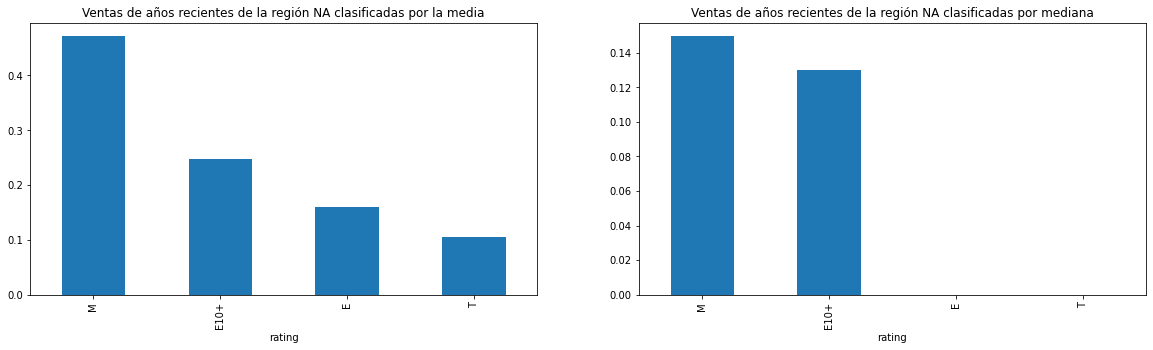

In [74]:
#Ingresos recientes de juegos por año clasificación 
plt.subplots(figsize=(20, 5)) 
dataset_after_2012.groupby('rating')['na_sales'].mean().sort_values(ascending=False).plot(
    kind='bar', ax= plt.subplot(1,2,1))
plt.title('Ventas de años recientes de la región NA clasificadas por la media')

dataset_after_2012.groupby('rating')['na_sales'].median().sort_values(ascending=False).plot(
    kind='bar', ax= plt.subplot(1,2,2))
plt.title('Ventas de años recientes de la región NA clasificadas por mediana')

plt.show()

Así como en las resultados globales, los juegos con clasificación M son los que tienen mas ventas en promedio, seguidos por E10+. La mediana es similar teniendo los juegos M primero y los E10+ segundos.

## Región EU (Europa)

### Plataformas principales

In [75]:
#plataformas principales de años recientes, ingresos históricos
dataset_after_2012.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)

platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.85
Name: eu_sales, dtype: float64

In [76]:
for plat in ['PS3','PS4','X360','3DS','PC']:
    print('Año de lanzamiento del primer juego de la plataforma',plat,':'
          ,df.query('platform == @plat')['year_of_release'].min())

Año de lanzamiento del primer juego de la plataforma PS3 : 2006
Año de lanzamiento del primer juego de la plataforma PS4 : 2013
Año de lanzamiento del primer juego de la plataforma X360 : 2005
Año de lanzamiento del primer juego de la plataforma 3DS : 2011
Año de lanzamiento del primer juego de la plataforma PC : 1985


La plataforma PS4 es la más popular, superando a la ya popular PS3, tomando en cuenta la expectativa de 6 años de vida útil desde el lanzamiento del PS3 allá en el 2006 está en las expectativas que el PS4 siga creciendo aún más para el siguiente año. El mercado del X360 y XOne es menor comparado a los del PS3 y PS4, en forma inversa de como se comporta en la región NA.

### Los cinco géneros principales

In [77]:
#Los 5 géneros principales de los años recientes con mayor promedio de ingresos históricos
dataset_after_2012.groupby('genre')['eu_sales'].mean().sort_values(ascending=False).head(5)

genre
Shooter       0.480890
Sports        0.256840
Platform      0.251882
Racing        0.235259
Simulation    0.177439
Name: eu_sales, dtype: float64

Los juegos del género Shooter vuelven a ser los más populares en la región de Europa, seguido por los juegos Sports y Platform. A diferencia de la región de NA y de la global, aparecen los juegos Racing y Simulation como el cuarto y quinto género más popular.

### Efectos del ESRB en las ventas

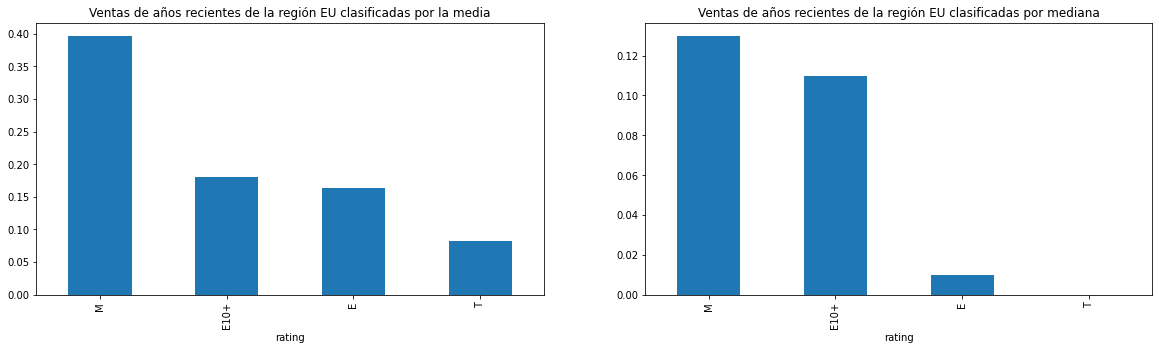

In [78]:
#Ingresos recientes de juegos por año clasificación
plt.subplots(figsize=(20, 5)) 
dataset_after_2012.groupby('rating')['eu_sales'].mean().sort_values(ascending=False).plot(
    kind='bar', ax= plt.subplot(1,2,1))
plt.title('Ventas de años recientes de la región EU clasificadas por la media')

dataset_after_2012.groupby('rating')['eu_sales'].median().sort_values(ascending=False).plot(
    kind='bar', ax= plt.subplot(1,2,2))
plt.title('Ventas de años recientes de la región EU clasificadas por mediana')

plt.show()

De nuevo aparecen los juegos M con la media y mediana más alta, seguidos por los juegos E10+.

## Región JP (Japón)

### Plataformas principales

In [79]:
#plataformas principales de años recientes, ingresos históricos
dataset_after_2012.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

platform
3DS     87.84
PS3     35.29
PSV     21.11
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64

In [80]:
for plat in ['3DS','PS3','PSV','PS4','WiiU']:
    print('Año de lanzamiento del primer juego de la plataforma',plat,':'
          ,df.query('platform == @plat')['year_of_release'].min())

Año de lanzamiento del primer juego de la plataforma 3DS : 2011
Año de lanzamiento del primer juego de la plataforma PS3 : 2006
Año de lanzamiento del primer juego de la plataforma PSV : 2011
Año de lanzamiento del primer juego de la plataforma PS4 : 2013
Año de lanzamiento del primer juego de la plataforma WiiU : 2012


En la región de Japón hay una diferencia notoria en cual plataforma es la más popular, siendo la 3DS. Y se mantiene plataformas que siguiendo la expectativa de vida de estas, pueden estar acercandose al final. 

### Los cinco géneros principales

In [81]:
#Los 5 géneros principales de los años recientes con mayor promedio de ingresos históricos
dataset_after_2012.groupby('genre')['jp_sales'].mean().sort_values(ascending=False).head(5)

genre
Role-Playing    0.176183
Simulation      0.126951
Platform        0.101529
Fighting        0.086606
Puzzle          0.076429
Name: jp_sales, dtype: float64

La región de Japón a diferencia de las otras dos regiones de NA y EU, muestra a los juegos del género 'Role-Playing' como su predilecto, seguido por los de 'Simulation' y 'Platform'. No se encuentra el género 'shooter' en el top 5 a diferencia de las otras regiones.

### Efectos del ESRB en las ventas

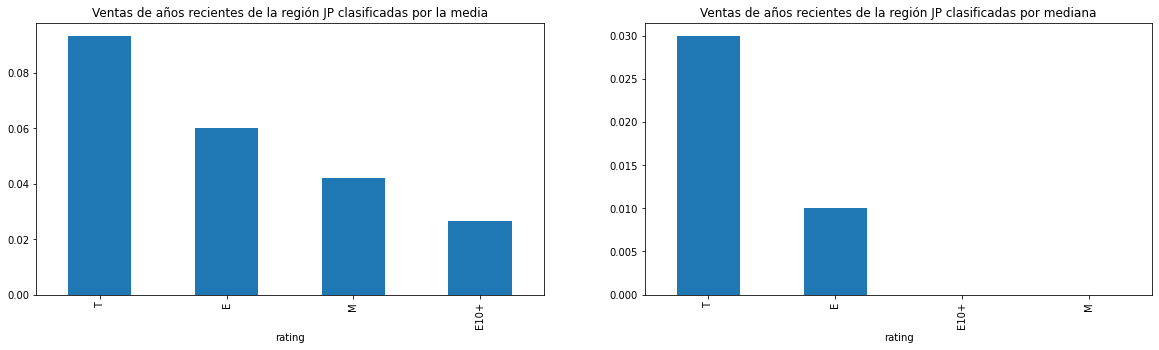

In [82]:
#Ingresos recientes de juegos por año clasificación sin AO ni K-A
plt.subplots(figsize=(20, 5)) 
dataset_after_2012.groupby('rating')['jp_sales'].mean().sort_values(ascending=False).plot(
    kind='bar', ax= plt.subplot(1,2,1))
plt.title('Ventas de años recientes de la región JP clasificadas por la media')

dataset_after_2012.groupby('rating')['jp_sales'].median().sort_values(ascending=False).plot(
    kind='bar', ax= plt.subplot(1,2,2))
plt.title('Ventas de años recientes de la región JP clasificadas por mediana')

plt.show()

La mayoría de los juegos vendidos son de clasificación T y poseen la mediana más grande, seguidos por los juegos clasificación 'E'.

## Cuotas de mercado

In [83]:
dataset_after_2012.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(3)

platform
PS4     314.14
PS3     288.79
X360    236.54
Name: total_sales, dtype: float64

In [84]:
#Ingresos totales recientes
total_income = dataset_after_2012['total_sales'].sum()

#Ingresos por plataforma de los últimos años
after_ps3 = dataset_after_2012.query('platform == "PS3"')
after_x360 = dataset_after_2012.query('platform == "X360"')
after_ps4 = dataset_after_2012.query('platform == "PS4"')

#variaciones en sus cuotas de mercado de una región a otra de plataforma PS4
print('Variación en cuota de mercado entre regiónes de la plataforma PS4')
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    print(region,  round(after_ps4[region].sum() /total_income*100,3)  ,'%')

Variación en cuota de mercado entre regiónes de la plataforma PS4
na_sales 7.51 %
eu_sales 9.744 %
jp_sales 1.102 %


In [85]:
#variaciones en sus cuotas de mercado de una región a otra de plataforma PS3
print('Variación en cuota de mercado entre regiónes de la plataforma PS3')
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    print(region,  round(after_ps3[region].sum() /total_income*100,3)  ,'%')

Variación en cuota de mercado entre regiónes de la plataforma PS3
na_sales 7.14 %
eu_sales 7.38 %
jp_sales 2.437 %


In [86]:
#variaciones en sus cuotas de mercado de una región a otra de plataforma X360
print('Variación en cuota de mercado entre regiónes de la plataforma X360')
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    print(region,  round(after_x360[region].sum() /total_income*100,3)  ,'%')

Variación en cuota de mercado entre regiónes de la plataforma X360
na_sales 9.672 %
eu_sales 5.146 %
jp_sales 0.108 %


###### Conclusiones:

- Las cuotas de la región NA son notablemente superiores en la plataforma X360 y estando segundas en las plataformas de PS3 por una pequeña diferencia y más notoria la diferencia en la plataforma PS4.

- Las cuotas de la región EU son superiores en las plataformas de PS3 y PS4, solo siendo superados en la plataforma X360.

- Las cuotas de la región JP son las más bajas en todas las plataformas más populares

# Pruebas de hipótesis

Se deben verificar las siguientes hipótesis:

- Las calificaciones promedio de los usuarios de las plataformas Xbox One y PC son las mismas.
- Las calificaciones promedio de los usuarios de los géneros de Acción y Deportes son diferentes.

## Las calificaciones promedio de los usuarios de las plataformas Xbox One y PC son las mismas.

Disponemos las hipótesis de la siguiente manera:

- Hipótesis nula(H0): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas

- Hipótesis alterna(H1): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes

Se establece el umbral alfa en 5%

Previo al comprobar las hipótesis principales, comprobaremos que la distrución de ambas muestras sean normales.

- Hipótesis nula: Los datos siguen una distribución normal.

- Hipótesis alterna: Los datos no siguen una distribución normal.

Se establece el umbral alfa en 5%

In [87]:
#Creación datasets para xone y Pc 
user_score_xo = dataset_after_2012.query(
'platform == "XOne" and user_score != "tbd" and user_score.isna() == False'
                                                                    )['user_score'].astype('float')
user_score_pc = dataset_after_2012.query(
    'platform == "PC" and user_score != "tbd" and user_score.isna() == False'
                                                                    )['user_score'].astype('float')

alpha = 0.05 #nivel de significancia estadística crítica

# Normalidad de los residuos Shapiro-Wilk test Xone
shapiro_test = st.shapiro(user_score_xo)
print('Variable user_score de plataforma XOne:')
print(shapiro_test)

if shapiro_test[1] < alpha: print("Se rechaza la hipótesis nula")
else: print("No se rechaza la hipótesis nula")
print()

# Normalidad de los residuos Shapiro-Wilk test PC
shapiro_test = st.shapiro(user_score_pc)
print('Variable user_score de plataforma PC:')
print(shapiro_test)

if shapiro_test[1] < alpha: print("Se rechaza la hipótesis nula")
else: print("No se rechaza la hipótesis nula")

Variable user_score de plataforma XOne:
ShapiroResult(statistic=0.955055296421051, pvalue=1.524856543255737e-05)
Se rechaza la hipótesis nula

Variable user_score de plataforma PC:
ShapiroResult(statistic=0.9382862448692322, pvalue=1.141219598821408e-07)
Se rechaza la hipótesis nula


In [88]:
#Varianza de las muestras - prueba de levene
levene_test = st.levene (user_score_xo, user_score_pc, center = 'median') 
print('Prueba de varianzas iguales:')
print(levene_test)

if levene_test[1] < alpha: print("Se rechaza la hipótesis nula")
else: print("No se rechaza la hipótesis nula")
print()

Prueba de varianzas iguales:
LeveneResult(statistic=6.295287176069245, pvalue=0.01251484281850554)
Se rechaza la hipótesis nula



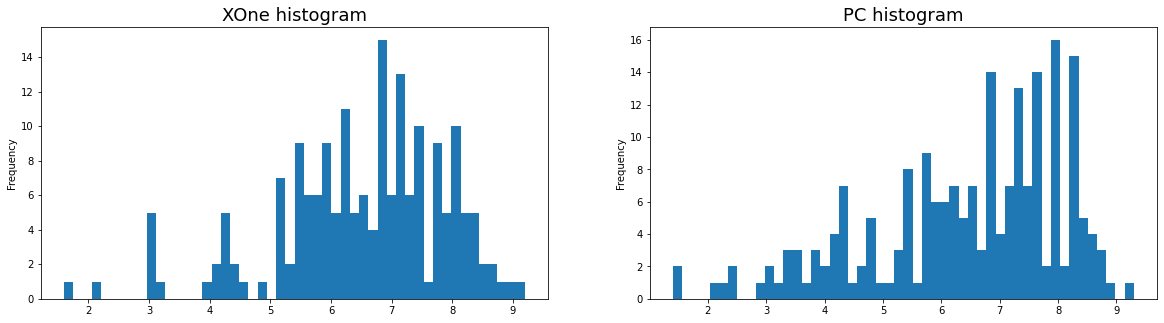

In [89]:
#Graficar datos
plt.subplots(figsize=(20, 5)) 
user_score_xo.plot(kind='hist', ax= plt.subplot(1,2,1),bins=50)
plt.title('XOne histogram',fontsize = 18)

user_score_pc.plot(kind='hist', ax= plt.subplot(1,2,2),bins=50)
plt.title('PC histogram',fontsize = 18)
plt.show()

Hipótesis nula: Las calificaciones promedio de los usuarios de las plataformas Xbox One y PC son iguales.

Hipótesis alternativa: Las calificaciones promedio de los usuarios de las plataformas Xbox One y PC son diferentes.

Se establece el umbral alfa en 5%

In [90]:
#Prueba de la hipótesis principal
results = st.ttest_ind(user_score_xo, user_score_pc,equal_var=False)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Se rechaza la hipótesis nula. Las calificaciones promedio de los usuarios de las plataformas Xbox One y PC son diferentes")
else:
    print("No se rechaza la hipótesis nula")

p-value:  0.5489537965134912
No se rechaza la hipótesis nula


No se rechaza la hipótesis nula por lo que no se tiene evidencia suficiente para decir que las calificaciones promedio de las plataformas Xbox One y PC son diferentes. Por ende las calificiones promedio de los usuarios de las plataformas Xbox One y PC son iguales.

## Las calificaciones promedio de los usuarios de los géneros de Acción y Deportes son diferentes.

Disponemos las hipótesis de la siguiente manera:

- Hipótesis nula(H0): Las calificaciones promedio de los usuarios son las mismas para los géneros de Acción y Deportes

- Hipótesis alterna(H1): Las calificaciones promedio de los usuarios de los géneros de Acción y Deportes son diferentes.

Se establece el umbral alfa en 5%

Previo a comprobar las hipótesis principales, se verificará que la distribucion de ambas muestras sea normal.

- Hipótesis nula: Los datos siguen una distribución normal.

- Hipótesis alterna: Los datos no siguen una distribución normal.

Se establece el umbral alfa en 5%

In [91]:
#comprobación de distribución normal
user_score_ac = dataset_after_2012.query(
    'genre == "Action" and user_score != "tbd" and user_score.isna() == False'
                                                                        )['user_score'].astype('float')
user_score_sp = dataset_after_2012.query(
    'genre == "Sports" and user_score != "tbd" and user_score.isna() == False'
                                                                        )['user_score'].astype('float')

# Normalidad de los residuos Shapiro-Wilk test Xone
shapiro_test = st.shapiro(user_score_ac)
print('Variable user_score del género acción:')
print(shapiro_test)

if shapiro_test[1] < alpha: print("Se rechaza la hipótesis nula")
else: print("No se rechaza la hipótesis nula")
print()

# Normalidad de los residuos Shapiro-Wilk test PC
shapiro_test = st.shapiro(user_score_sp)
print('Variable user_score del género deportes:')
print(shapiro_test)

if shapiro_test[1] < alpha: print("Se rechaza la hipótesis nula")
else: print("No se rechaza la hipótesis nula")

Variable user_score del género acción:
ShapiroResult(statistic=0.9127251505851746, pvalue=8.404243035555937e-17)
Se rechaza la hipótesis nula

Variable user_score del género deportes:
ShapiroResult(statistic=0.9690107107162476, pvalue=0.0002625079359859228)
Se rechaza la hipótesis nula


Ambas variables se distribuyen de forma normal

In [92]:
#Varianza de las muestras - prueba de levene
levene_test = st.levene (user_score_ac, user_score_sp, center = 'median') 
print('Prueba de varianzas iguales:')
print(levene_test)

if levene_test[1] < alpha: print("Se rechaza la hipótesis nula")
else: print("No se rechaza la hipótesis nula")
print()

Prueba de varianzas iguales:
LeveneResult(statistic=19.378395093859265, pvalue=1.2353575419762759e-05)
Se rechaza la hipótesis nula



Ahora comprobaremos la hipótesis principal:

- Hipótesis nula: Las calificaciones promedio de los usuarios de los géneros de Acción y Deportes son iguales.

- Hipótesis alternativa: Las calificaciones promedio de los usuarios de los géneros de Acción y Deportes son diferentes.

Se establece el umbral alfa en 5%

In [93]:
#Prueba de la hipótesis principal
results = st.ttest_ind(user_score_ac, user_score_sp,equal_var=False)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Se rechaza la hipótesis nula. Las calificaciones promedio de los usuarios de los géneros de Acción y Deportes son diferentes")
else:
    print("No se rechaza la hipótesis nula") 

p-value:  4.305337670692197e-20
Se rechaza la hipótesis nula. Las calificaciones promedio de los usuarios de los géneros de Acción y Deportes son diferentes


Se concluye que las calificaciones promedio de los usuarios de los géneros de acción y deportes son diferentes.

# Conclusiones

Respecto a las números de juegos lanzados a través de los años, ventas por plataforma, tiempo de vida, relación entre ventas y reseñas, género de juego y rating ESRB:

- Las ventas totales de juegos tuvieron su gran pico en el año 2009 y un descenso notorio en el 2011-2012.

- El modelo de proyección para el 2017, toma en cuenta los años 2012 en adelante.

- El total de ventas acumuladas en el transcurso de los años lo tiene la plataforma PS2, seguido por X360 y PS3.

- El tiempo promedio de vida útil o de relevancia de una plataforma es de 6 años.

- La mayoría de juegos muestran ventas hasta 4 años posterior a su año de lanzamiento.

- El PS4 y XOne son las plataformas que muestran más promesa para crecimiento a futuro.

- El género del videojuego si tiene influencia en de que un videojuego se venda con mayor o menor dificultad.

- Los valores de las críticas de los usuarios y profesionales influye en una pequeña cantidad, pero no como para determinar si un juego ganará más compras o perdería clientes potenciales.

- El género de 'Action' es el que presenta mayor número de juegos e ingresos históricos.

- Los géneros que más han vendido en los últimos años son los de: 'Shooter', 'Sports', 'Role-Playing'

- Los géneros menos rentables son los de : 'Adventure', 'Strategy' y 'Puzzle'.

Existen comportamientos diferentes entre las 3 regiones de Norteamérica, Europa y Japón.

- Norteamérica: Las plataformas más populares son las de X360, PS4, PS3, XOne, 3DS. Sus géneros más populares son los de Shooter, Sports, Platform, Misc, Fighting. La clasificación que más se vende es la de juegos M.

- Europa: Las plataformas más populares son las de PS4, PS3, X360, XOne, 3DS. Sus géneros más populares son los de Shooter, Sports, Platform, Racing, Simulation. La clasificación que más se vende es la de juegos M.

- Japón: Las plataformas más populares son las de 3DS, PS3, PSV, PS4, WiiU. Sus géneros más populares son los de Role-Playing, Simulation, Platform, Fighting, Puzzle. La clasificación que más se vende es la de juegos T. 

En la primera hipótesis, aceptamos la hipótesis nula de que las calificaciones promedio para las plataformas Xone y PC son iguales.

En la segunda hipótesis, rechazamos la hipótesis nula, por lo que las calificaciones promedio de los usuarios de los géneros de acción y deportes son diferentes.